<a href="https://colab.research.google.com/github/aditya-malte/Simple-LP1-Codes/blob/master/DA2(without_Sklearn_Naive_bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the Pima Dataset from kagggle:
https://www.kaggle.com/uciml/pima-indians-diabetes-database/download

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
data = pd.read_csv("diabetes.csv")

In [0]:
columns = data.columns

In [0]:
columns = [col_name for col_name in columns if not col_name=="Outcome"]

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


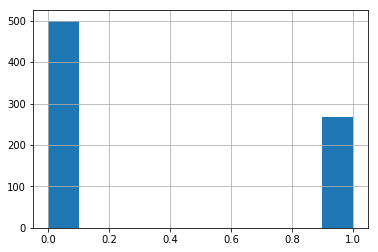

In [6]:
data["Outcome"].hist()

In [0]:
y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [0]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [13]:
train_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
350,4,92,80,0,0,42.2,0.237,29
6,3,78,50,32,88,31.0,0.248,26
33,6,92,92,0,0,19.9,0.188,28
245,9,184,85,15,0,30.0,1.213,49
91,4,123,80,15,176,32.0,0.443,34


In [14]:
train_y.head()

350    0
6      1
33     0
245    1
91     0
Name: Outcome, dtype: int64

In [15]:
test_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
332,1,180,0,0,0,43.3,0.282,41
249,1,111,86,19,0,30.1,0.143,23
669,9,154,78,30,100,30.9,0.164,45
478,8,126,74,38,75,25.9,0.162,39
651,1,117,60,23,106,33.8,0.466,27


In [16]:
test_y.head()

332    1
249    0
669    0
478    0
651    0
Name: Outcome, dtype: int64

In [0]:
#generate summary
train_mean_pos = train_X[train_y==1].mean()
train_std_pos = train_X[train_y==1].std()
train_mean_neg = train_X[train_y==0].mean()
train_std_neg = train_X[train_y==0].std()

In [18]:
train_mean_pos

Pregnancies                   4.864322
Glucose                     140.236181
BloodPressure                71.527638
SkinThickness                22.130653
Insulin                      98.271357
BMI                          35.255276
DiabetesPedigreeFunction      0.546874
Age                          36.618090
dtype: float64

In [19]:
train_std_pos

Pregnancies                   3.747953
Glucose                      32.159161
BloodPressure                19.875318
SkinThickness                17.963010
Insulin                     138.692184
BMI                           6.970737
DiabetesPedigreeFunction      0.372249
Age                          10.808474
dtype: float64

In [20]:
train_mean_neg

Pregnancies                   3.357988
Glucose                     109.636095
BloodPressure                68.556213
SkinThickness                18.816568
Insulin                      65.819527
BMI                          30.042604
DiabetesPedigreeFunction      0.423775
Age                          31.594675
dtype: float64

In [21]:
train_std_neg

Pregnancies                  3.063949
Glucose                     25.697755
BloodPressure               18.100890
SkinThickness               15.146429
Insulin                     87.534885
BMI                          7.808742
DiabetesPedigreeFunction     0.282013
Age                         11.921538
dtype: float64

In [0]:
summary = { "train_mean_pos": train_mean_pos.tolist() , "train_std_pos": train_std_pos.tolist(), 
           "train_mean_neg": train_mean_neg.tolist(), "train_std_neg": train_std_neg.tolist()}

In [23]:
summary

{'train_mean_neg': [3.3579881656804735,
  109.63609467455622,
  68.55621301775147,
  18.816568047337277,
  65.81952662721893,
  30.04260355029588,
  0.42377514792899396,
  31.59467455621302],
 'train_mean_pos': [4.864321608040201,
  140.23618090452263,
  71.52763819095478,
  22.13065326633166,
  98.2713567839196,
  35.25527638190955,
  0.5468743718592968,
  36.618090452261306],
 'train_std_neg': [3.063949194185171,
  25.69775473369275,
  18.100890345879094,
  15.146429417251934,
  87.53488479885338,
  7.808742439299097,
  0.28201297879956233,
  11.92153755221639],
 'train_std_pos': [3.7479534371111063,
  32.15916064861882,
  19.87531817799438,
  17.963009552893716,
  138.6921841820957,
  6.970736798512504,
  0.37224878899136504,
  10.808473778758989]}

In [0]:
import numpy as np
def cond_prob(x, mn, stddv):  #value , mean, standard dev| this is that fancy formula: 1/root(sigma^2)....
    varnc = stddv*stddv
    p = 1/(np.sqrt(2*np.pi*varnc)) * np.exp((-(x-mn)**2)/(2*varnc))
    return p


In [0]:
def predict(row, summary):

  #prior probability obtained as probability of class
  #i.e. we find fraction of positive samples present in the whole dataset
  prob_positive=len(summary["train_mean_pos"])/( len(summary["train_mean_pos"])+len(summary["train_mean_neg"]) )
  #then multiply it with conditional probability of each feature
  for i in range(0, len(row)):
    prob_positive = prob_positive * cond_prob(row[i],summary["train_mean_pos"][i], summary["train_std_pos"][i])
  

  #exact same process for negative
  prob_negative=len(summary["train_mean_neg"])/( len(summary["train_mean_pos"])+len(summary["train_mean_neg"]) )
  for i in range(0, len(row)):
    prob_negative = prob_negative * cond_prob(row[i],summary["train_mean_neg"][i], summary["train_std_neg"][i])
  
  return [prob_positive, prob_negative]

In [0]:
predictions_raw = []
for row in test_X.values.tolist():
  predictions_raw.append(predict(row, summary))

In [27]:
predictions_raw

[[1.081080499816779e-16, 4.6267965476144094e-18],
 [8.363324392238236e-14, 1.068777260411779e-12],
 [2.941306541807416e-13, 5.690913980251013e-14],
 [1.8846780737095908e-13, 3.3255429840987294e-13],
 [4.703601469763976e-13, 2.9242926593831307e-12],
 [1.0761050193095872e-13, 7.69388486554156e-15],
 [2.023984147077191e-17, 4.2560801509864325e-16],
 [3.4240754600107495e-13, 1.6059398300842902e-13],
 [1.739028406424198e-14, 4.356523750058428e-14],
 [1.1139877333908661e-13, 5.241715196089907e-13],
 [5.1999490795062623e-14, 6.309040319398944e-13],
 [4.891916056519244e-15, 1.1597229511749616e-14],
 [1.3689626360908473e-14, 1.6484702673575683e-16],
 [2.0180447203898612e-13, 6.157205196854831e-13],
 [3.2448440676884315e-14, 7.904460395257122e-15],
 [1.0185281627782808e-13, 1.1466227504745084e-12],
 [2.3817790474022585e-13, 1.4028073617315109e-12],
 [1.0968275135544451e-13, 2.2448735901437445e-14],
 [6.30396778319898e-15, 8.44611805540061e-15],
 [1.2702818828238e-14, 1.0620994284263472e-12],
 [1

In [0]:
predictions = []
for row in predictions_raw:
  if(row[0]>row[1]):
    predictions.append(1)
  else:
    predictions.append(0)

In [29]:
confusion_matrix(test_y.tolist(), predictions)

array([[126,  36],
       [ 16,  53]])